In [54]:
import nltk as nl

In [55]:
#nl.download()

In [56]:
#Tokenizing Words & Sentences

from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

word_tokens=word_tokenize(EXAMPLE_TEXT)
sent_tokens=sent_tokenize(EXAMPLE_TEXT)

print('Tokenised sentence: \n')
for i in sent_tokens[:10]:
    print(i)
    
print('\nTokenised words: \n')
for i in word_tokens[:10]:
    print(i)

Tokenised sentence: 

Hello Mr. Smith, how are you doing today?
The weather is great, and Python is awesome.
The sky is pinkish-blue.
You shouldn't eat cardboard.

Tokenised words: 

Hello
Mr.
Smith
,
how
are
you
doing
today
?


In [57]:
#Stop Words
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
filtered_sentence=[]
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print('\nTokenised words: \n')
print(word_tokens)
print('\nFiiltered words: \n')
print(filtered_sentence)


Tokenised words: 

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']

Fiiltered words: 

['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'Python', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard', '.']


In [58]:
#Stemming Words
from nltk.stem import PorterStemmer
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]
for w in example_words:
    print(ps.stem(w))
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."
words = word_tokenize(new_text)
print('\nStemmed sentence')
for w in words[:10]:
    print(ps.stem(w))

python
python
python
python
pythonli

Stemmed sentence
It
is
import
to
by
veri
pythonli
while
you
are


In [59]:
#POS Tagging
#PunktSentenceTokenizer is an unsupervised machile learning sentence tokenizer
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train=state_union.raw('2005-GWBush.txt')
test=state_union.raw('2006-GWBush.txt')

sent_tokenizer=PunktSentenceTokenizer(train)
tokenized=sent_tokenizer.tokenize(test)
type(tokenized)
for i in tokenized[:10]:
    words=nltk.word_tokenize(i)
    tagged=nltk.pos_tag(words)
    for j in tagged[:10]:
        print(j)

0.04020979020979021 0.07357859531772576 0.03836930455635491 5720 299 230 22
0.002972027972027972 0.0033444816053511705 0.002951484965873455 5720 299 17 1
0.0008741258741258741 0.006688963210702341 0.0005534034311012728 5720 299 5 2
0.0024475524475524478 0.016722408026755852 0.0016602102933038186 5720 299 14 5
0.0013986013986013986 0.0033444816053511705 0.0012912746725696365 5720 299 8 1
0.0034965034965034965 0.0033444816053511705 0.003504888396974728 5720 299 20 1
0.017132867132867134 0.04013377926421405 0.01586423169156982 5720 299 98 12
0.005244755244755245 0.006688963210702341 0.005165098690278546 5720 299 30 2
0.005944055944055944 0.026755852842809364 0.004796163069544364 5720 299 34 8
0.04493006993006993 0.043478260869565216 0.04501014572957019 5720 299 257 13
0.00017482517482517483 0.0033444816053511705 0.0 5720 299 1 1
0.016258741258741258 0.0802675585284281 0.012728278915329275 5720 299 93 24
0.001048951048951049 0.0033444816053511705 0.0009223390518354548 5720 299 6 1
0.029545

In [60]:
#Chunking
# Regular expressions to chunk
for i in tokenized[:2]:
    words=nltk.word_tokenize(i)
    tagged=nltk.pos_tag(words)
    
    chunkGram=r'''Chunk:{<RB.?>*<VB.?>*<NNP>+<NN>?}'''
    
    chunkParser=nltk.RegexpParser(chunkGram)
    chunked=chunkParser.parse(tagged)
    
    chunked.draw()

In [61]:
#Chinking
#}{ is used to avoid that you don't need in your chunk
for i in tokenized[:2]:
    words=nltk.word_tokenize(i)
    tagged=nltk.pos_tag(words)
    
    chunkGram=r'''Chunk:{<RB.?>*<VB.?>*<NNP>+<NN>?}
                        }<VB.?|IN|DT|TO|JJ>+{'''
    
    chunkParser=nltk.RegexpParser(chunkGram)
    chunked=chunkParser.parse(tagged)
    
    chunked.draw()

In [62]:
#Named Entity Recognition
for i in tokenized[:2]:
    words=nltk.word_tokenize(i)
    tagged=nltk.pos_tag(words)
    namedEnt=nltk.ne_chunk(tagged, binary=True)
    namedEnt.draw()

In [63]:
#Lemmatising
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
print(lemmatizer.lemmatize('cats'))
print(lemmatizer.lemmatize('geese'))
print(lemmatizer.lemmatize('puppy'))
print(lemmatizer.lemmatize('better',pos='a'))
print(lemmatizer.lemmatize('cacti'))
print(lemmatizer.lemmatize('runs'))

cat
goose
puppy
good
cactus
run


In [64]:
#Corpora
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
sample=gutenberg.raw('bible-kjv.txt')
tok=sent_tokenize(sample)
print(tok[5:15])


['1:5 And God called the light Day, and the darkness he called Night.', 'And the evening and the morning were the first day.', '1:6 And God said, Let there be a firmament in the midst of the waters,\nand let it divide the waters from the waters.', '1:7 And God made the firmament, and divided the waters which were\nunder the firmament from the waters which were above the firmament:\nand it was so.', '1:8 And God called the firmament Heaven.', 'And the evening and the\nmorning were the second day.', '1:9 And God said, Let the waters under the heaven be gathered together\nunto one place, and let the dry land appear: and it was so.', '1:10 And God called the dry land Earth; and the gathering together of\nthe waters called he Seas: and God saw that it was good.', '1:11 And God said, Let the earth bring forth grass, the herb yielding\nseed, and the fruit tree yielding fruit after his kind, whose seed is\nin itself, upon the earth: and it was so.', '1:12 And the earth brought forth grass, and

In [3]:
#WordNet Synonyms, Antonyms, Definitions and even context
from nltk.corpus import wordnet
syns=wordnet.synsets('program')

#synset
print(syns[0].name())
#just the word
print(syns[0].lemmas()[0].name())
#definition
print(syns[0].definition())
#examples
print(syns[0].examples())

synonyms=[]
antonyms=[]

for syn in wordnet.synsets('good'):
    for l in syn.lemmas():
#         print('l:',l)
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
# print(set(synonyms))
# print(set(antonyms))

#Symantics Similarity
w1=wordnet.synset("ship.n.01")
w2=wordnet.synset("boat.n.01")
print(w1.wup_similarity(w2))

w1=wordnet.synset("ship.n.01")
w2=wordnet.synset("car.n.01")
print(w1.wup_similarity(w2))

w1=wordnet.synset("ship.n.01")
w2=wordnet.synset("cat.n.01")
print(w1.wup_similarity(w2))

plan.n.01
plan
a series of steps to be carried out or goals to be accomplished
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


ValueError: not enough values to unpack (expected 3, got 1)

In [66]:
#Text Classification for sentiment analysis
import nltk
import random
from nltk.corpus import movie_reviews

documents= [(list(movie_reviews.words(fileid)),category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


 random.shuffle(documents)

# print(documents[0])
all_words=[]
for w in movie_reviews.words():
    all_words.append(w.lower())
all_words=nltk.FreqDist(all_words)
print(all_words.most_common(15))

print(all_words['stupid'])


[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
253


In [77]:
#Words as features for learning
import nltk
import random
from nltk.corpus import movie_reviews

documents= [(list(movie_reviews.words(fileid)),category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


# random.shuffle(documents)

all_words=[]
for w in movie_reviews.words():
    all_words.append(w.lower())
    
all_words=nltk.FreqDist(all_words)

word_features=list(all_words.keys())[:3000]

def find_features(document):
    words=set(document)
    features={}
    for w in word_features:
        features[w]=(w in words)
    return features
print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets=[(find_features(rev),category) for(rev,category) in documents]


{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [85]:
#Naive Bayes of nltk
training_set=featuresets[:1900]
testing_set=featuresets[1900:]
classifier=nltk.NaiveBayesClassifier.train(training_set)
print('Naive bayes algo accuracy:',(nltk.classify.accuracy(classifier,testing_set))*100)
classifier.show_most_informative_features(15)      

Naive bayes algo accuracy: 77.0
Most Informative Features
                 idiotic = True              neg : pos    =     12.1 : 1.0
                  annual = True              pos : neg    =     10.7 : 1.0
               atrocious = True              neg : pos    =     10.5 : 1.0
                   sucks = True              neg : pos    =      9.5 : 1.0
                 frances = True              pos : neg    =      9.3 : 1.0
           unimaginative = True              neg : pos    =      7.5 : 1.0
                 cunning = True              pos : neg    =      7.0 : 1.0
                  sexist = True              neg : pos    =      6.9 : 1.0
             silverstone = True              neg : pos    =      6.9 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
              schumacher = True              neg : pos    =      6.7 : 1.0
                  suvari = True              neg : pos    =      6.3 : 1.0
                    mena = True           

In [86]:
#Save classifier with pickle
import pickle
save_classifier=open("naivebayes.pickle",'wb')
pickle.dump(classifier,save_classifier)
save_classifier.close()

#opening saved classifier
cf=open('naivebayes.pickle','rb')
classifier=pickle.load(cf)
cf.close()

print('Naive bayes algo accuracy:',(nltk.classify.accuracy(classifier,testing_set))*100)

classifier.show_most_informative_features(15)    

Naive bayes algo accuracy: 77.0
Most Informative Features
                 idiotic = True              neg : pos    =     12.1 : 1.0
                  annual = True              pos : neg    =     10.7 : 1.0
               atrocious = True              neg : pos    =     10.5 : 1.0
                   sucks = True              neg : pos    =      9.5 : 1.0
                 frances = True              pos : neg    =      9.3 : 1.0
           unimaginative = True              neg : pos    =      7.5 : 1.0
                 cunning = True              pos : neg    =      7.0 : 1.0
                  sexist = True              neg : pos    =      6.9 : 1.0
             silverstone = True              neg : pos    =      6.9 : 1.0
                  regard = True              pos : neg    =      6.9 : 1.0
              schumacher = True              neg : pos    =      6.7 : 1.0
                  suvari = True              neg : pos    =      6.3 : 1.0
                    mena = True           

In [94]:
#Scikit Learn incorporation with nltk
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

MNB_classifier=SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print('MNB_classifier accuracy percent:',(nltk.classify.accuracy(MNB_classifier,testing_set))*100)

# GaussianNB_classifier=SklearnClassifier(GaussianNB())
# GaussianNB_classifier.train(training_set)
# print('GaussianNB accuracy percent:',(nltk.classify.accuracy(GaussianNB_classifier,testing_set))*100)

BernoulliNB_classifier=SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print('BernoulliNB accuracy percent:',(nltk.classify.accuracy(BernoulliNB_classifier,testing_set))*100)

LogisticRegression_classifier=SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print('LogisticRegression accuracy percent:',(nltk.classify.accuracy(LogisticRegression_classifier,testing_set))*100)


SGDClassifier_classifier=SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print('SGDClassifier accuracy percent:',(nltk.classify.accuracy(SGDClassifier_classifier,testing_set))*100)


SVC_classifier=SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print('SVC classifier accuracy percent:',(nltk.classify.accuracy(SVC_classifier,testing_set))*100)


LinearSVC_classifier=SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print('LinearSVC accuracy percent:',(nltk.classify.accuracy(LinearSVC_classifier,testing_set))*100)


NuSVC_classifier=SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print('NuSVC accuracy percent:',(nltk.classify.accuracy(NuSVC_classifier,testing_set))*100)




MNB_classifier accuracy percent: 77.0
BernoulliNB accuracy percent: 77.0
LogisticRegression accuracy percent: 80.0
SGDClassifier accuracy percent: 68.0
SVC classifier accuracy percent: 57.99999999999999
LinearSVC accuracy percent: 81.0
NuSVC accuracy percent: 80.0


In [98]:
#Investing Bias
# Copy from the youtube link
from nltk.classify import ClassifierI
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers=classifiers
        
    def classify(self,features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
            return mode(votes)
        
    def confidence(self,features):
        votes=[]
        for c in self._classifiers:
            v=c.classify(features)
            votes.append(v)
            
        choice_votes=votes.count(mode(votes))
        conf=choice_votes/ len(votes)
        return conf

voted_classifier=VoteClassifier(MNB_classifier, GaussianNB_classifier, BernoulliNB_classifier, LogisticRegression_classifier, SGDClassifier_classifier, SVC_classifier, LinearSVC_classifier, NuSVC_classifier)
print('Voted classifier accuracy is',voted_classifier)

Voted classifier accuracy is <__main__.VoteClassifier object at 0x11f8a09e8>


In [99]:
#Better trainig data


In [114]:
#Sentiment Analysis Module
import nltk
import random
#from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize



class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
short_pos = open("positive.txt","r",encoding='latin-1').read()
short_neg = open("negative.txt","r",encoding='latin-1').read()

# move this up here
all_words = []
documents = []


#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for p in short_pos.split('\n'):
    documents.append( (p, "pos") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

    
for p in short_neg.split('\n'):
    documents.append( (p, "neg") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())



save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


all_words = nltk.FreqDist(all_words)


word_features = list(all_words.keys())[:5000]


save_word_features = open("word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]
save_features=open('featuresets.pickle','wb')
pickle.dump(featuresets,save_features)
save_features.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

###############
save_classifier = open("originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()


LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()


##NuSVC_classifier = SklearnClassifier(NuSVC())
##NuSVC_classifier.train(training_set)
##print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

10664
Original Naive Bayes Algo accuracy percent: 74.24698795180723
Most Informative Features
                    flat = True              neg : pos    =     22.2 : 1.0
              engrossing = True              pos : neg    =     19.8 : 1.0
                  boring = True              neg : pos    =     19.3 : 1.0
                 generic = True              neg : pos    =     16.9 : 1.0
                mediocre = True              neg : pos    =     16.2 : 1.0
               inventive = True              pos : neg    =     15.1 : 1.0
                 routine = True              neg : pos    =     14.9 : 1.0
               wonderful = True              pos : neg    =     13.1 : 1.0
                powerful = True              pos : neg    =     13.1 : 1.0
                    warm = True              pos : neg    =     12.7 : 1.0
              refreshing = True              pos : neg    =     12.4 : 1.0
                  stupid = True              neg : pos    =     11.3 : 1.0
      

In [129]:
#Trying out sentiment module
import sentiment_mod as s
print(s.sentiment("A shameless cash grab, the movie is absolutely mercenary in its approach to eliciting screams; there’s an almost admirable mean-spiritedness to its tactics."))
print(s.sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))


('neg', 0.6)
('neg', 1.0)


In [137]:
#Twitter Sentiment Analysis
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s

#consumer key, consumer secret, access token, access secret.
ckey="KtjFT3wOmsu8oArjEUsQP9Ceo"
csecret="OOcVpjljNqpYe0UFAse8W5PK3fWjMRVanFf4BAx0Y5DiE13vqE"
atoken="86505353-tJuvKReog7CbCyqSx0iErqmYTdZgFYokQPYfQzxr4"
asecret="4myG6d4XMM7a7oNV9c3drgAWXbajwsso9NS2AJzB1RYlO"

class listener(StreamListener):

    def on_data(self, data):
        all_data = json.loads(data)
        
        tweet = all_data["text"]
        sentiment_value,confidence=s.sentiment(tweet)
        print((tweet, sentiment_value, confidence))
        
        if confidence*100>=80:
            output=open('twitter-out.txt','a')
            output.write(sentiment_value)
            output.write('\n')
            output.close()
        
        return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(track=["happy"])

('Happy Eclipse Day! Be safe.', 'pos', 1.0)
('RT @LiamPaulCanning: Mauricio Pochettino: “We were better than Chelsea. I am happy to lose that way.”\n\nAwful, losing mentality. Very poor.', 'neg', 1.0)
('RT @MagdaMeghy: @marienassar_ Happy new week, Marie. Have a nice day 🌺', 'pos', 1.0)
("@salazarsoph Happy birthday, Shin! 🎉 May you be blessed with your heart's desires 😊 Hope you're having an amazing day! Much love 💛", 'pos', 1.0)
('RT @box_komiyaarisa: HAPPY PARTY TRAIN TOUR 2駅目の神戸公演、無事終了しました☺️\n神戸の2日間も本当に楽しかった！\n皆さんの素敵な笑顔にたくさんパワーもらったので次の駅にも元気一杯で向かえそうです🚃🚃🚃🚃🚃🚃🚃🚃🚃🚃✨\n\n次は… ', 'neg', 1.0)
('RT @GeorgieStunts: Not quite the start to the morning I expected! #morning #loosehorse #thatsmygarden! #happy #naughtyboy @easibed… ', 'pos', 1.0)
('@indiaforums @BarunSobtiSays @TheBarunSobti @BarunsAngels @BarunSobtiTurky @BarunSobtiPage @BarunSobtiifc… https://t.co/ZabudkmdlD', 'neg', 1.0)
('RT @BarcaNewsForum: Barcelona full-back Aleix Vidal celebrates his 28th Birthday today. Happy Birthday!! #Al

ProtocolError: ('Connection broken: IncompleteRead(5530 bytes read)', IncompleteRead(5530 bytes read))

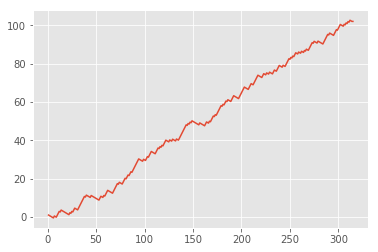

In [138]:
#Graphing Live Twitter Sentiment
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
def animate(i):
    pullData = open('twitter-out.txt','r').read()
    lines=pullData.split('\n')
    xar=[]
    yar=[]
    x=0
    y=0
    for l in lines:
        x+=1
        if 'pos' in l:
            y+=1
        elif 'neg' in l:
            y-=0.3
        xar.append(x)
        yar.append(y)
            
    ax1.clear()
    ax1.plot(xar, yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()
